# TP 1 Visión Por Computadora 1

* Mauro Aguirregaray
* Fabricio Denardi

**Consideraciones generales**
1. Siempre que lo consideramos necesario, realizamos un tipado de las funciones como una explicación detallada.
2. Intentamos nomenclar siempre en inglés variables, métodos, clases etc, aunque para un mejor entendimiento los comentarios los hicimos en español.


## Parte 1

### 1. Implementar el algoritmo de pasaje a coordenadas cromáticas para librarnos de las variaciones de contraste

In [23]:
%matplotlib inline
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [24]:
# Cargo las imagenes
img_CC_1 = cv.imread('coord_cromaticas/CoordCrom_1.png')
img_CC_2 = cv.imread('coord_cromaticas/CoordCrom_2.png')
img_CC_3 = cv.imread('coord_cromaticas/CoordCrom_3.png')

In [25]:
# Convertir de BGR a RGB
img_CC_1 = cv.cvtColor(img_CC_1, cv.COLOR_BGR2RGB)
img_CC_2 = cv.cvtColor(img_CC_2, cv.COLOR_BGR2RGB)
img_CC_3 = cv.cvtColor(img_CC_3, cv.COLOR_BGR2RGB)

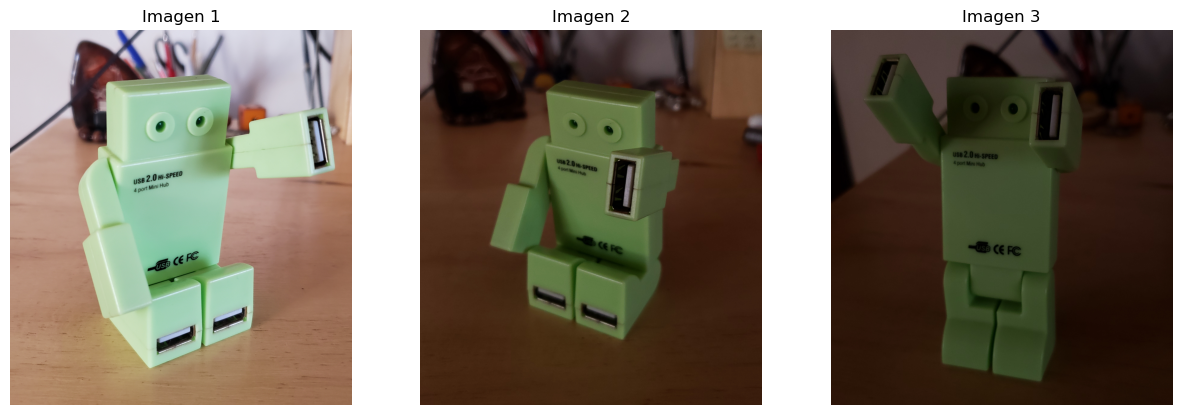

In [26]:
# Mostrar las imágenes
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(img_CC_1)
plt.title('Imagen 1')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(img_CC_2)
plt.title('Imagen 2')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(img_CC_3)
plt.title('Imagen 3')
plt.axis('off')

plt.show()

Dadas las intensidades de los componentes rojo \( R \), verde \( G \) y azul \( B \), las coordenadas cromáticas se pueden calcular como:

 X = $\frac{R}{R + G + B}$ 

 Y = $\frac{G}{R + G + B}$ 

 Z = $\frac{B}{R + G + B}$ 

Donde \( X \), \( Y \) y \( Z \) son las coordenadas cromáticas. La suma de \( X \), \( Y \) y \( Z \) siempre será igual a 1.

In [27]:
def rgb_to_CC(image):
    # Convertimos a float32 para evitar problemas con la división
    image = image.astype(np.float32)

    # Calculamos la suma de los canales R, G, B
    sum_channels = np.sum(image, axis=2, keepdims=True)  

    # Para evitar la división por 0 hardcodeamos un 1 para esa suma y cuando hagamos la conversión a coord cromaticas pasaremos un 0
    sum_channels[sum_channels == 0] = 1

    # Calcular las coordenadas cromáticas
    chromatic_image = image / sum_channels

    return chromatic_image


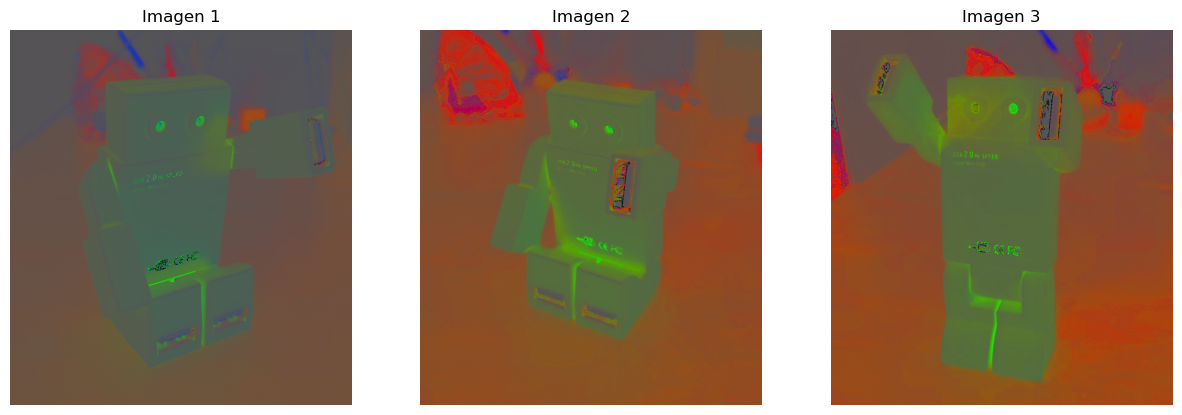

In [28]:
# Convertimos a coordenadas cromáticas
img_CC_1_converted = rgb_to_CC(img_CC_1)
img_CC_2_converted = rgb_to_CC(img_CC_2)
img_CC_3_converted = rgb_to_CC(img_CC_3)

# Ploteamos con coordenadas cromáticas
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(img_CC_1_converted)
plt.title('Imagen 1')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(img_CC_2_converted)
plt.title('Imagen 2')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(img_CC_3_converted)
plt.title('Imagen 3')
plt.axis('off')

plt.show()

### 2. Implementar el algoritmo White Patch para librarnos de las diferencias de color de iluminación.

Primero trabajaremos con las imágenes de las manos

In [29]:
# Cargo las imagenes
img_WP_Hands1 = cv.imread('white_patch/test_blue.png')
img_WP_Hands2 = cv.imread('white_patch/test_green.png')
img_WP_Hands3 = cv.imread('white_patch/test_red.png')

# Convertir de BGR a RGB
img_WP_Hands1 = cv.cvtColor(img_WP_Hands1, cv.COLOR_BGR2RGB)
img_WP_Hands2 = cv.cvtColor(img_WP_Hands2, cv.COLOR_BGR2RGB)
img_WP_Hands3 = cv.cvtColor(img_WP_Hands3, cv.COLOR_BGR2RGB)

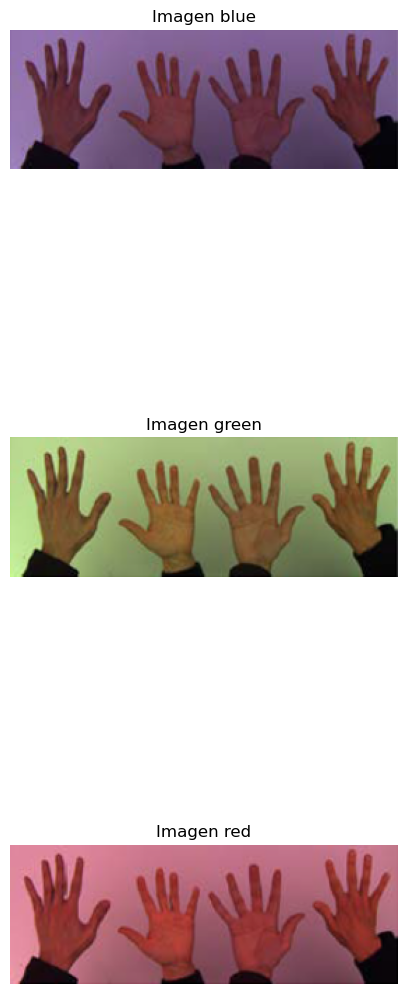

In [30]:
# Mostrar las imágenes
plt.figure(figsize=(5, 15))

plt.subplot(3, 1, 1)
plt.imshow(img_WP_Hands1)
plt.title('Imagen blue')
plt.axis('off')

plt.subplot(3, 1, 2)
plt.imshow(img_WP_Hands2)
plt.title('Imagen green')
plt.axis('off')

plt.subplot(3, 1, 3)
plt.imshow(img_WP_Hands3)
plt.title('Imagen red')
plt.axis('off')

plt.show()

Dado un canal de color $C$ (donde $C$ puede ser $R$, $G$, o $B$) y su valor máximo $C_{\text{max}}$, el valor normalizado $C_{\text{norm}}$ para un píxel es:

Para el canal Rojo $R$:
\[ $R_{\text{norm}} = \frac{R}{R_{\text{max}}} \times 255$ \]

Para el canal Verde $G$:
\[ $G_{\text{norm}} = \frac{G}{G_{\text{max}}} \times 255$ \]

Para el canal Azul $B$:
\[ $B_{\text{norm}} = \frac{B}{B_{\text{max}}} \times 255$ \]

Donde $R_{\text{norm}}$, $G_{\text{norm}}$ y $B_{\text{norm}}$ son los valores normalizados para cada canal de color.


In [31]:
def white_patch(image):
    # Convertimos a float32 para evitar problemas con la división
    image = image.astype(np.float32)

    # Buscamos el máximo en cada canal de color
    max_r = np.max(image[:, :, 0])
    max_g = np.max(image[:, :, 1])
    max_b = np.max(image[:, :, 2])

    # Normalizamos cada canal por el valor máximo
    image[:, :, 0] = image[:, :, 0] / max_r * 255
    image[:, :, 1] = image[:, :, 1] / max_g * 255
    image[:, :, 2] = image[:, :, 2] / max_b * 255

    # Convertir la imagen de vuelta a tipo uint8
    image = np.clip(image, 0, 255).astype(np.uint8)
    
    return image

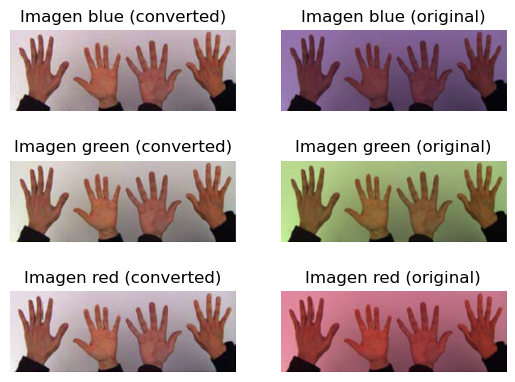

In [32]:
# Convertimos con WP
img_WP_Hands1_converted = white_patch(img_WP_Hands1)
img_WP_Hands2_converted = white_patch(img_WP_Hands2)
img_WP_Hands3_converted = white_patch(img_WP_Hands3)

# Primera columna de imágenes convertidas
plt.subplot(3, 2, 1)
plt.imshow(img_WP_Hands1_converted)
plt.title('Imagen blue (converted)')
plt.axis('off')

plt.subplot(3, 2, 3)
plt.imshow(img_WP_Hands2_converted)
plt.title('Imagen green (converted)')
plt.axis('off')

plt.subplot(3, 2, 5)
plt.imshow(img_WP_Hands3_converted)
plt.title('Imagen red (converted)')
plt.axis('off')

# Segunda columna de imágenes originales
plt.subplot(3, 2, 2)
plt.imshow(img_WP_Hands1)
plt.title('Imagen blue (original)')
plt.axis('off')

plt.subplot(3, 2, 4)
plt.imshow(img_WP_Hands2)
plt.title('Imagen green (original)')
plt.axis('off')

plt.subplot(3, 2, 6)
plt.imshow(img_WP_Hands3)
plt.title('Imagen red (original)')
plt.axis('off')

# Mostrar las imágenes
plt.show()


Pasamos a ver el alien

In [33]:
# Cargo las imagenes
img_WP_Alien1 = cv.imread('white_patch/wp_blue.jpg')
img_WP_Alien2 = cv.imread('white_patch/wp_green.png')
img_WP_Alien3 = cv.imread('white_patch/wp_green2.jpg')
img_WP_Alien4 = cv.imread('white_patch/wp_red.png')
img_WP_Alien5 = cv.imread('white_patch/wp_red2.jpg')

# Convertir de BGR a RGB
img_WP_Alien1 = cv.cvtColor(img_WP_Alien1, cv.COLOR_BGR2RGB)
img_WP_Alien2 = cv.cvtColor(img_WP_Alien2, cv.COLOR_BGR2RGB)
img_WP_Alien3 = cv.cvtColor(img_WP_Alien3, cv.COLOR_BGR2RGB)
img_WP_Alien4 = cv.cvtColor(img_WP_Alien4, cv.COLOR_BGR2RGB)
img_WP_Alien5 = cv.cvtColor(img_WP_Alien5, cv.COLOR_BGR2RGB)

# Convertimos con WP
img_WP_Alien1_converted = white_patch(img_WP_Alien1)
img_WP_Alien2_converted = white_patch(img_WP_Alien2)
img_WP_Alien3_converted = white_patch(img_WP_Alien3)
img_WP_Alien4_converted = white_patch(img_WP_Alien4)
img_WP_Alien5_converted = white_patch(img_WP_Alien5)

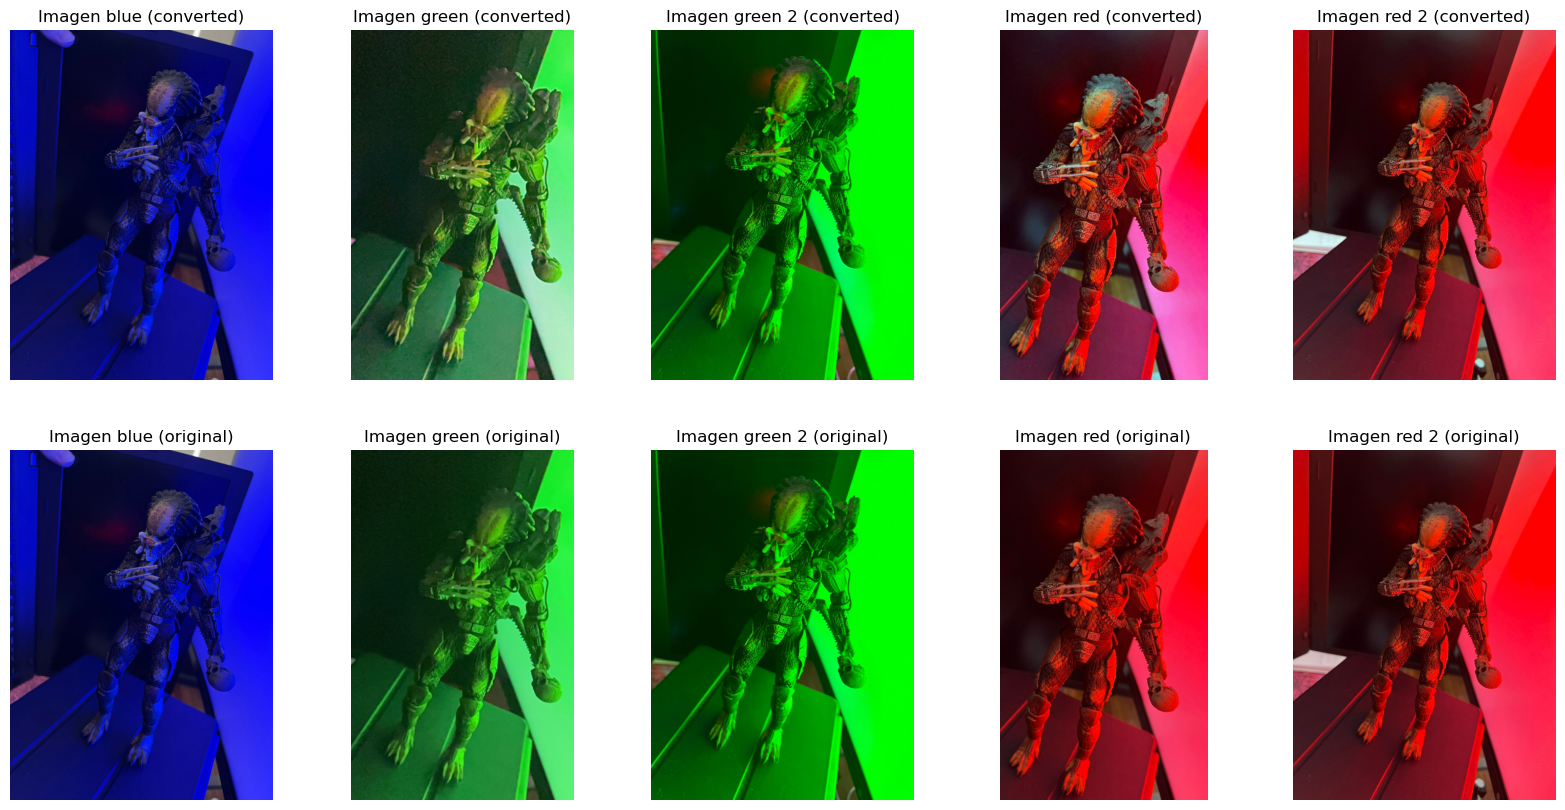

In [34]:
# Mostrar las imágenes
plt.figure(figsize=(20, 10))

# Primera fila de imágenes convertidas
plt.subplot(2, 5, 1)
plt.imshow(img_WP_Alien1_converted)
plt.title('Imagen blue (converted)')
plt.axis('off')

plt.subplot(2, 5, 2)
plt.imshow(img_WP_Alien2_converted)
plt.title('Imagen green (converted)')
plt.axis('off')

plt.subplot(2, 5, 3)
plt.imshow(img_WP_Alien3_converted)
plt.title('Imagen green 2 (converted)')
plt.axis('off')

plt.subplot(2, 5, 4)
plt.imshow(img_WP_Alien4_converted)
plt.title('Imagen red (converted)')
plt.axis('off')

plt.subplot(2, 5, 5)
plt.imshow(img_WP_Alien5_converted)
plt.title('Imagen red 2 (converted)')
plt.axis('off')

# Segundaa fila de imágenes originales
# Primera fila de imágenes convertidas
plt.subplot(2, 5, 6)
plt.imshow(img_WP_Alien1)
plt.title('Imagen blue (original)')
plt.axis('off')

plt.subplot(2, 5, 7)
plt.imshow(img_WP_Alien2)
plt.title('Imagen green (original)')
plt.axis('off')

plt.subplot(2, 5, 8)
plt.imshow(img_WP_Alien3)
plt.title('Imagen green 2 (original)')
plt.axis('off')

plt.subplot(2, 5, 9)
plt.imshow(img_WP_Alien4)
plt.title('Imagen red (original)')
plt.axis('off')

plt.subplot(2, 5, 10)
plt.imshow(img_WP_Alien5)
plt.title('Imagen red 2 (original)')
plt.axis('off')

# Mostrar las imágenes
plt.show()


### 3. Mostrar los resultados obtenidos y analizar las posibles fallas (si es que las hay) en el caso de White patch.

Resulta muy interesante analizar como se comporta el white patch en las imágenes convertidas:

* En el caso de las imagenes de las manos el comportamiento es excelente, si bien se nota alguna diferencia entre las imágenes, si solo se muestra la imagen ya convertida es muy díficil observar de que imagen precede, es decir, no se puede distinguir con que tipo de luz fue iluminada la foto en un principio. De esta manera cumple a la perfección la premisa de white patch que es que la luz que lo ilumina no influencie en la percepción que tenemos del objeto.
* En cuanto a la imagen del alien, se observan más limitaciones del algoritmo y que tampoco puede hacer "magia". Si bien en todos los casos la percepción que tenemos del objeto se influencia por la luz que se ilumina, sí encontramos que se llegan percibir algunos colores que en la imagen original es dificil de observar, en dónde más se nota esto es en la imagen green (el verde de la figura se diferencia mucho más que en la original) y en la red ("aparecen" los colores verdes de la figura que no se veían claramente antes)

En cuanto a las limitaciones matemáticas del algoritmo distinguimos:

1. Si el máximo en cada canal es 255 el numerador y denominador se me cancelar y queda igual a la imagen original. Esto es probable que ocurra y haría que esté realizando un gasto computacional sin ningun beneficio.

2. Algo que es poco probable que ocurra, pero es un problema en fin, es que el denominador sea 0, lo que significaría que el canal esté totalmente anulado (el máximo de toda la imagen es 0) y sería un problema potencial del input a resolver.

## Parte 2

### 1. Para las imágenes img1_tp.png y img2_tp.png leerlas con OpenCV en escala de grisas y visualizarlas.

In [35]:
# Cargar una imagen en modo monocromático (un canal)
img1_tp = cv.imread('img1_tp.png', cv.IMREAD_GRAYSCALE)
img2_tp = cv.imread('img2_tp.png', cv.IMREAD_GRAYSCALE)

(-0.5, 286.5, 287.5, -0.5)

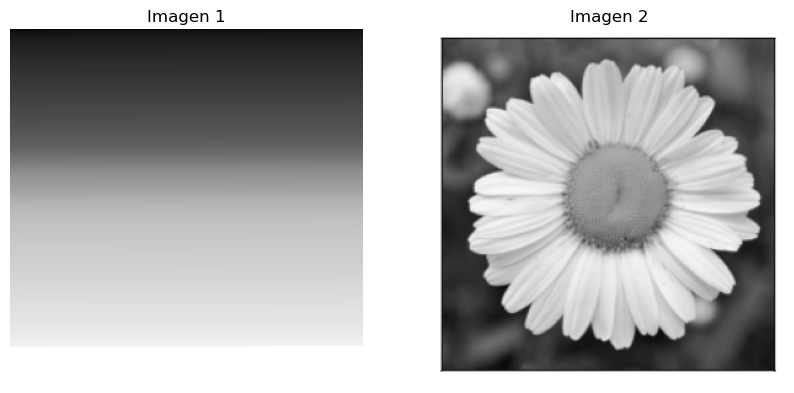

In [36]:
# Mostrar las imágenes
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img1_tp, cmap='gray')
plt.title('Imagen 1')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img2_tp, cmap='gray')
plt.title('Imagen 2')
plt.axis('off')

### 2. Elija el numero de bins que crea conveniente y grafique su histograma, compare los histogramas entre si.
Explicar lo que se observa, si tuviera que entrenar un modelo de clasificación/detección de imágenes,
considera que puede ser de utilidad tomar como ‘features’ a los histogramas?

In [37]:
## Función para generar los histogramas cambiando la cantidad de bins

def get_hist (img_to_process:np.ndarray, bins:int=256) -> np.ndarray:
    '''
    Crea el histograma 
    '''    
    hist,bins_edges = np.histogram(img_to_process.ravel(), bins=bins, range=[0, 256])

    # Calcular la posición central de cada barra
    bin_centers = (bins_edges[:-1] + bins_edges[1:]) / 2
    
    # Calcular el ancho de las barras
    
    width = np.diff(bins_edges)
                     

    return hist,bins_edges,bin_centers,width

img1_tp.png


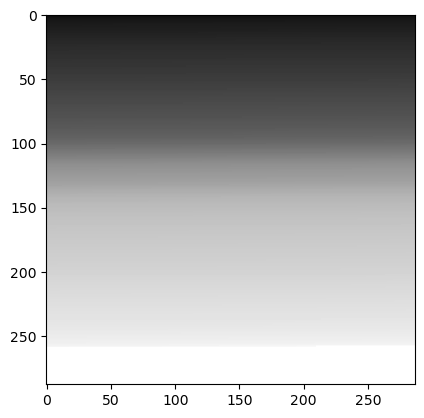

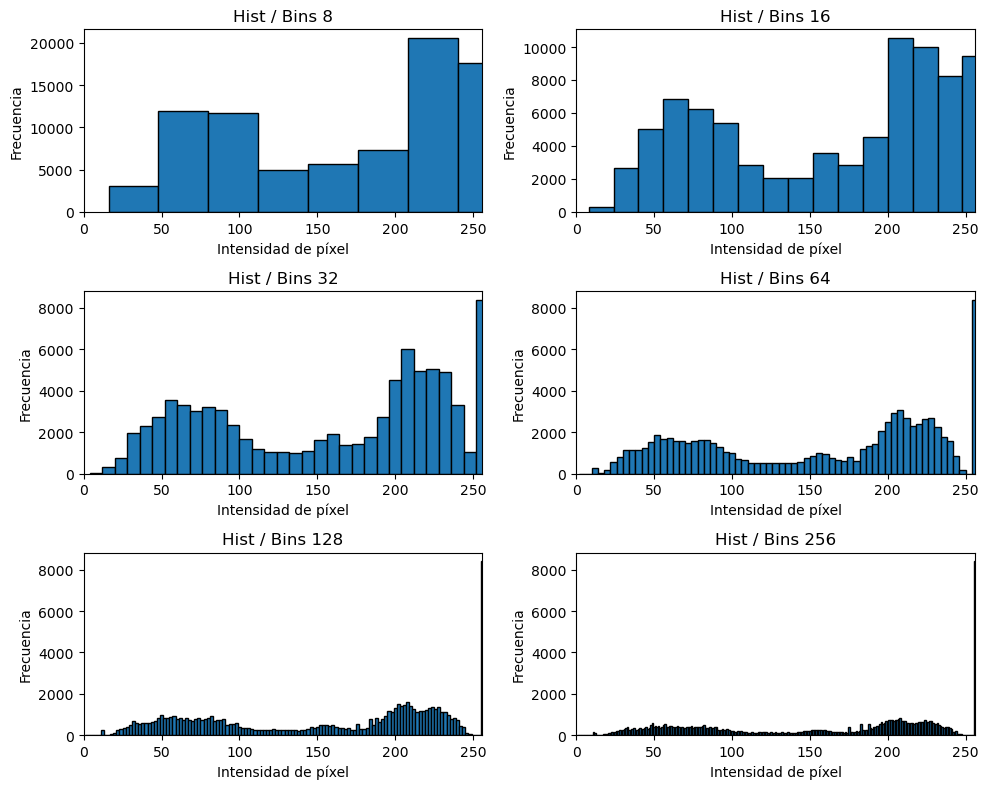

img2_tp.png


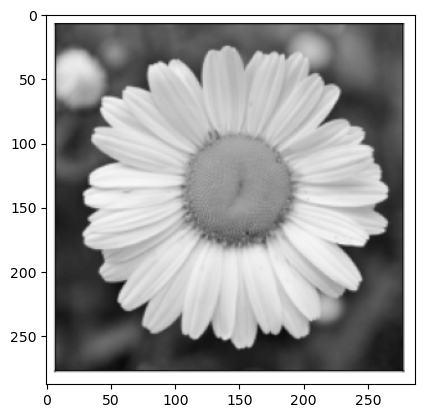

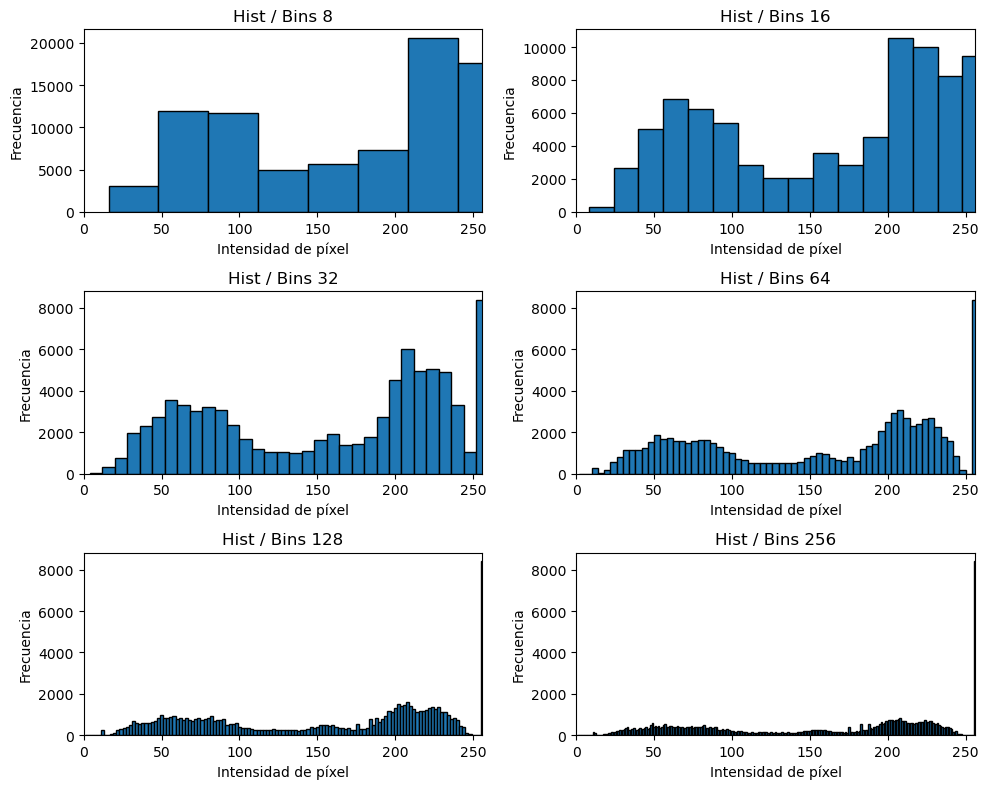

In [38]:
img_list = ['img1_tp.png','img2_tp.png']
bins_test = [8,16,32,64,128,256]
for img_name in img_list:
    print (img_name)
    img = cv.imread(img_name, cv.IMREAD_GRAYSCALE)
    fig = plt.figure()
    plt.imshow(img, cmap='gray')
    plt.show()
    
    fig = plt.figure(figsize=(10, 8))

    for ix,bins in enumerate(bins_test):
        hist,bins_edges,bin_centers,_width =get_hist(img,bins)

        plt.subplot(3, 2, ix + 1)  # Crear subtrama
        plt.bar(bin_centers, hist, width=_width,  align='edge', edgecolor='black')  # Graficar el histograma con barras
   
        #plt.plot(hist)  # Graficar el histograma
        plt.title(f'Hist / Bins {bins}')
        plt.xlabel('Intensidad de píxel')
        plt.ylabel('Frecuencia')
        plt.xlim([bins_edges[0], bins_edges[-1]])
    
    plt.tight_layout()
    plt.show()

1. Ambas imagenes, a pesar de ser diferentes en cuanto a lo que muestran (un degreadé vs una margarita) tienen una misma -o muy similar- distribución en sus histogramas

2. Los histogramas presentan una distrubición bimodal, aunque hay una saturación de blancos marcada.

3. La cantidad de bins adecuada, podrìa ser 32 o 64 así se distingue bien la bimodal y el peso de la sobresaturación de blancos no es tanto.

4. Respecto a si pueden ser considerados como un feature, la respuesta es sí, por los siguientes motivos:
- Son invariantes a la posición/orientación
- Me dan un descriptor compacto, sencillo, representativo y de fácil lectura
- Son sencillos de calcular
- Puedo obtener una reducción de la dimensionalidad
- Vale aclarar que no deberían ser el único feature, dado que, como vemos en este caso, un simple degradé tiene el mismo histograma que una flor, que podría estar siendo en realidad nuestro objeto de análisis. Por otro lado, el degradé nos podría ayudar como una especie de hash o representación de la imagen.

### 3. Para la imagen segmentacion.png analice el histograma de los canales RGB. Segmente algunos de los elementos presentes en la imagen (agua, cielo, tierra) y muestre, aplicando mascaras, las regiones en imágenes separadas.

Primero analizamos el histograma de los canales RGB

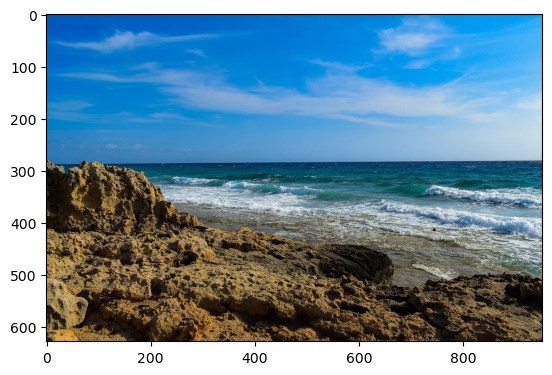

In [39]:
# Cargamos la figura
img_segmentacion = cv.imread('segmentacion.png')

img_segmentacion_RGB = cv.cvtColor(img_segmentacion, cv.COLOR_BGR2RGB)
plt.figure()
plt.imshow(img_segmentacion_RGB)
plt.show()


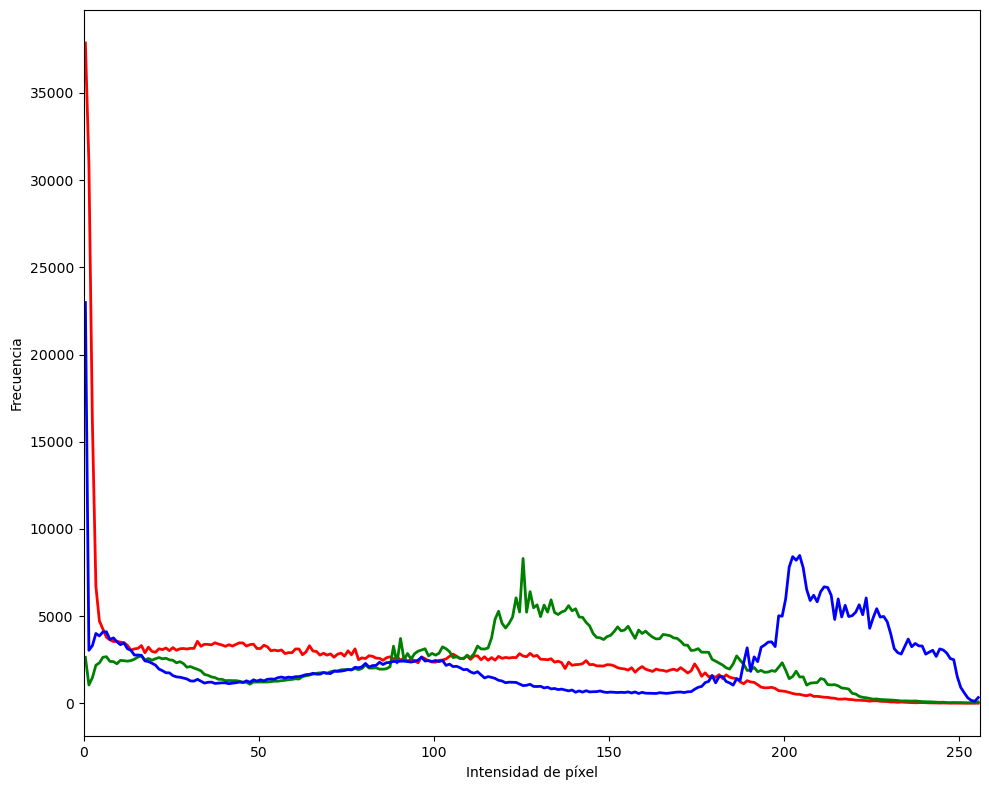

In [40]:
channels = {'r':0,'g':1,'b':2}

fig = plt.figure(figsize=(10, 8))
for k,v in channels.items():
    img_channel = img_segmentacion_RGB[:, :, v].flatten()

    hist,bins_edges,bin_centers,_width =get_hist(img_channel,bins)

    plt.plot(bin_centers, hist, color=k, linewidth=2)

    plt.xlabel('Intensidad de píxel')
    plt.ylabel('Frecuencia')
    plt.xlim([0, 256])

plt.tight_layout()
plt.show()

Varias conclusiones podemos sacar solo viendo el histograma por canal:

1. La imagen parece tener buen contraste, ya que tenemos una gran cantidad de píxeles en ambos extremos de intensidad
2. Además de lo anterior, todos los niveles de intensidad están representados, lo que muestra que la imagen tiene un alto rángo dinámico.
3. Hay una clara subexposición por el pico de valores con intensidad 0 o cercana a 0. Esto lo vemos por las sombras de la imagen.
4. Por último, en el histograma  se ve una distribución de intensidades suave y continua, no parece ser que la imagen haya sido modificada digitalmente.

Ahora pasamos a crear las máscaras, la idea es tener tres máscaras para cielo, agua y tierra.

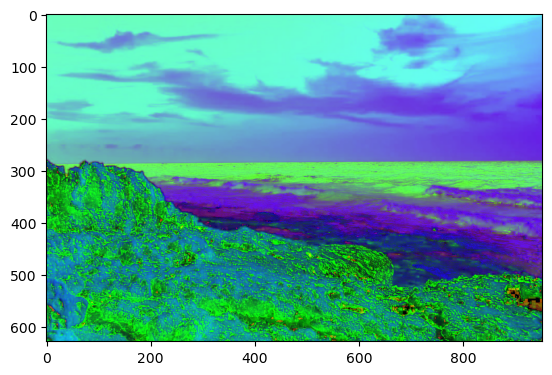

In [41]:
#Lo pasamos a HSV
img_segmentacion_HSV = cv.cvtColor(img_segmentacion, cv.COLOR_BGR2HSV)
plt.figure()
plt.imshow(img_segmentacion_HSV)

In [42]:
# Generamos la función que aplica la máscara para la subregión analizada
def get_region(region_name:str, img_HSV:np.ndarray, img_RGB:np.ndarray, region:list,sigma:list=[3,3,3],  minChannel:tuple=None, maxChannel:tuple=None):
    print (f"Nombre de la región: {region_name}")
    
    fig, axs = plt.subplots(1, 3, figsize=(15, 10))

    axs[0].imshow(img_RGB)
    axs[0].set_title('Original')
    axs[0].axis('off')


    x1,x2,y1,y2 = region[0],region[1],region[2],region[3]
    img_region = img_RGB[y1:y2,x1:x2,:]
    
    
   
    img_muestra_hsv = img_HSV[y1:y2,x1:x2,:]

    h, s, v = cv.split(img_muestra_hsv)
    color_mean, color_std = cv.meanStdDev(h)
    
    s_mean, s_std = cv.meanStdDev(s)
    v_mean, v_std = cv.meanStdDev(v)


    color_l = minChannel if not minChannel is None else (int(color_mean[0][0] - sigma[0] * color_std[0][0]),int(s_mean[0][0] - sigma[1] * s_std[0][0]),int(v_mean[0][0]- sigma[2] * v_std[0][0]))
    color_u = maxChannel if not maxChannel is None else  (int(color_mean[0][0] + sigma[0] * color_std[0][0]),int(s_mean[0][0] + sigma[1] * s_std[0][0]),int(v_mean[0][0] + sigma[2] * v_std[0][0]))

    mask = cv.inRange(img_HSV, color_l,  color_u)

    kernel = np.ones((2, 2), np.uint8)  # Ajusta el tamaño del kernel aquí

    mask = cv.morphologyEx(mask, cv.MORPH_CLOSE, kernel)
    mask = cv.morphologyEx(mask, cv.MORPH_OPEN, kernel)


    img_segmentada = cv.bitwise_and(img_RGB, img_RGB, mask=mask)

    axs[1].imshow(img_segmentada)
    axs[1].set_title(region_name)
    axs[1].axis('off')

    axs[2].imshow(img_region)
    axs[2].set_title('Región')
    axs[2].axis('off')


    plt.tight_layout()
    plt.show()


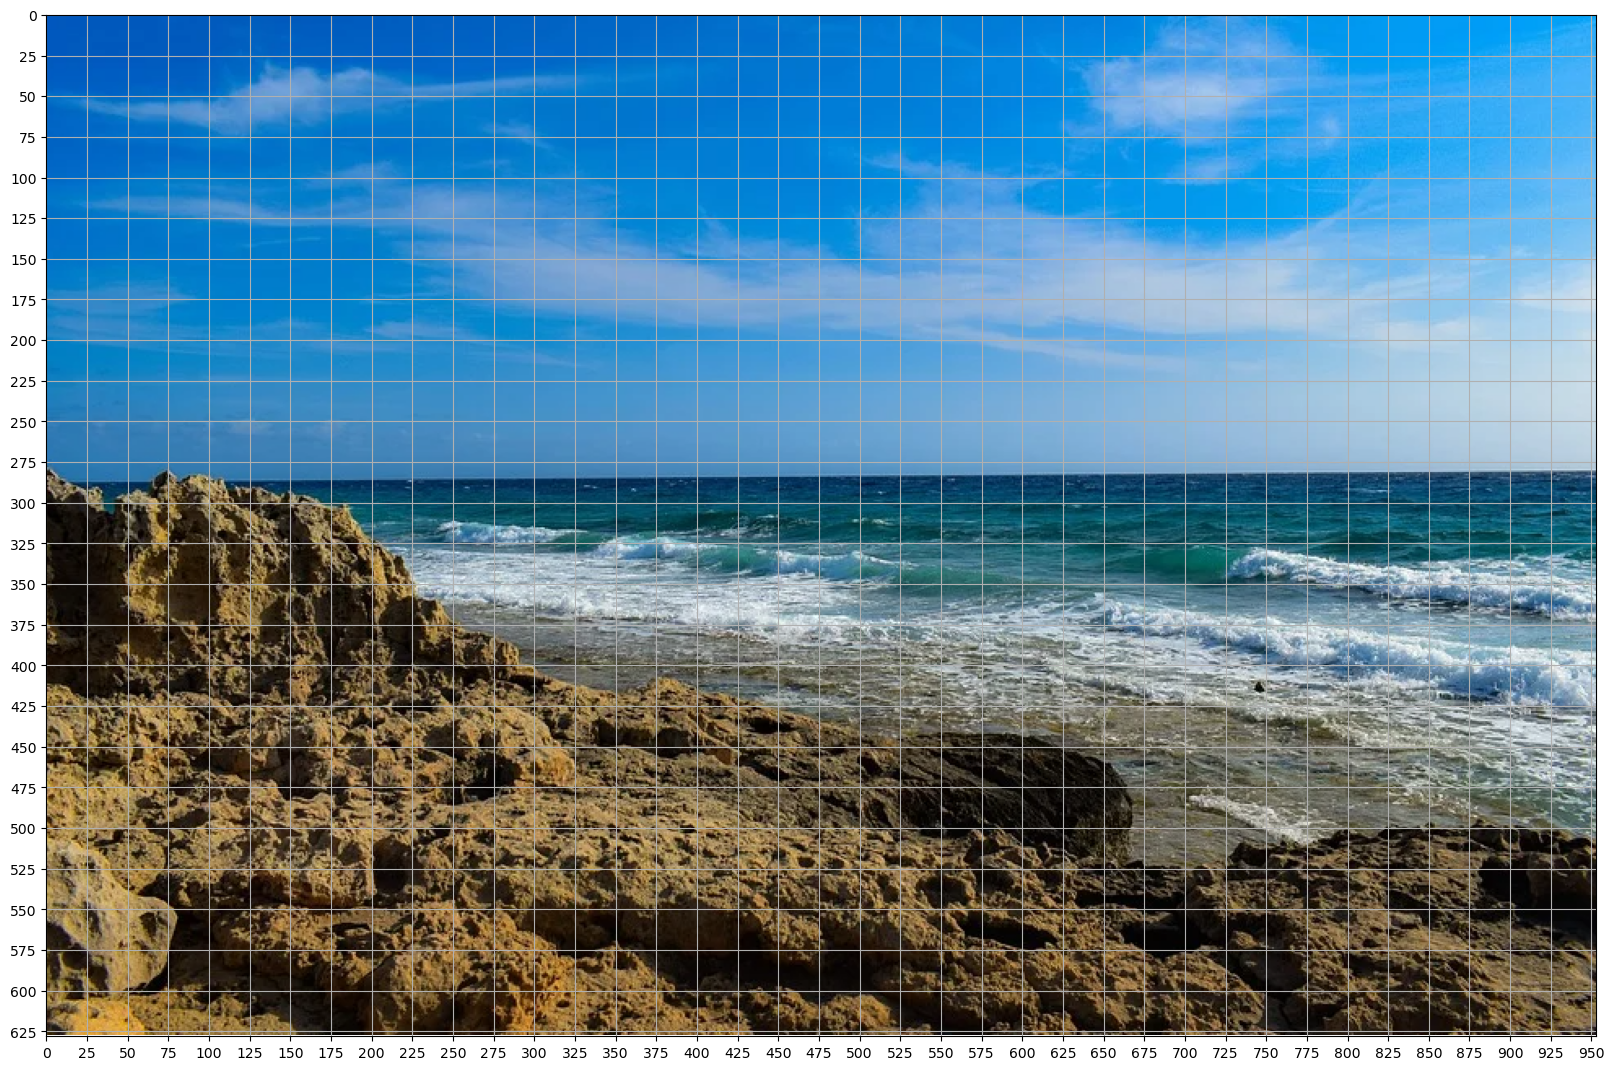

In [43]:
#Imprimir la imagen otra vez para tener la imagen con coordenadas e ir jugando con los x e y
plt.figure(figsize=(20, 16))
plt.imshow(img_segmentacion_RGB)
plt.grid(True)

plt.xticks(range(0, img_segmentacion_RGB.shape[1], 25))

plt.yticks(range(0, img_segmentacion_RGB.shape[0], 25))

# Ajustar los límites de los ejes para que coincidan con la imagen
plt.xlim(0, img_segmentacion_RGB.shape[1])
plt.ylim(img_segmentacion_RGB.shape[0], 0)  # Invertir el eje y para que el origen (0,0) esté en la esquina superior izquierda



plt.show()

Nombre de la región: Cielo


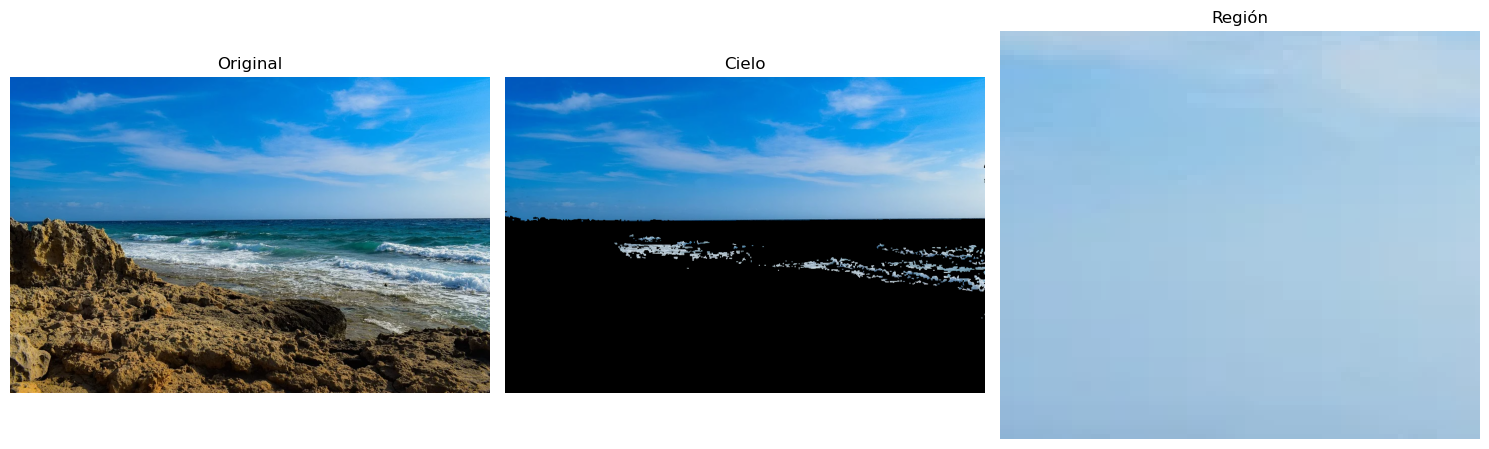

Nombre de la región: Agua


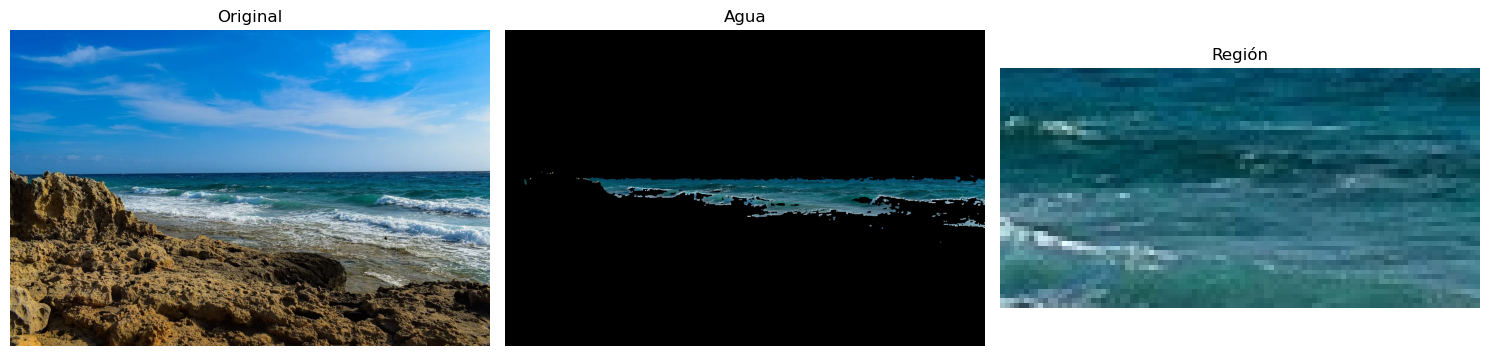

Nombre de la región: Tierra


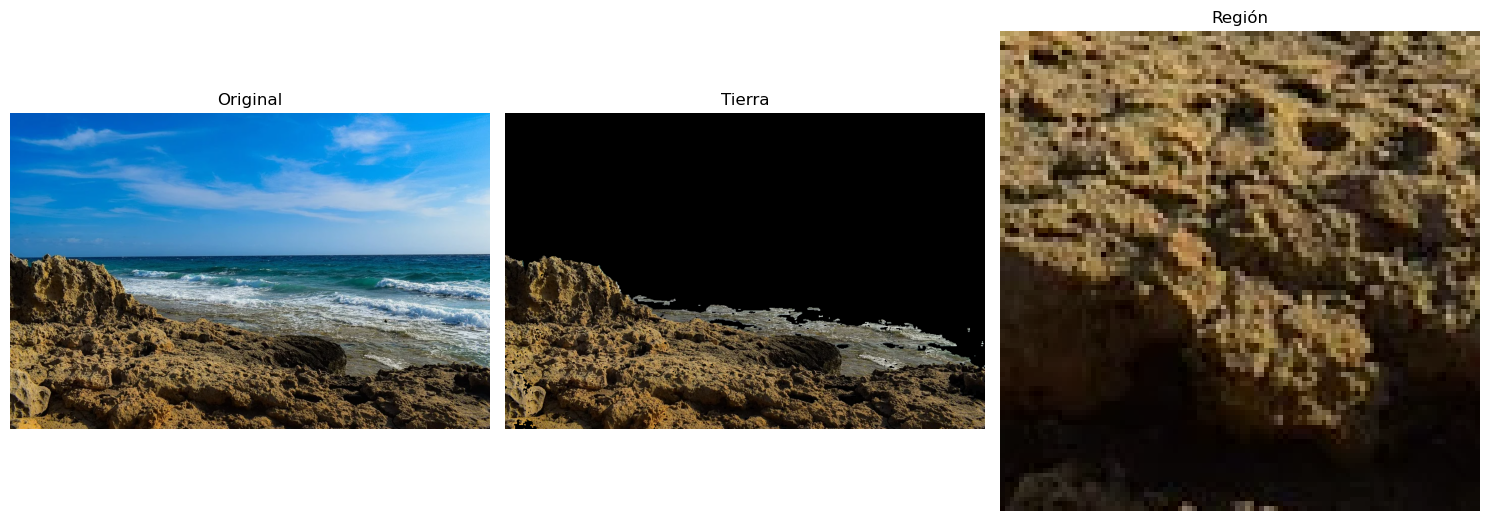

In [45]:
#Coords ->  X1,x2, Y1, Y2 en Fil - Col
regions = {'Cielo':([750,850,190,275],[3,3,3],(100,30,175),(110,255,255)),'Agua':([500,600,300,350],[2,2,3], None, None),'Tierra':([400,500,500,600],[3,3,2], None, None) }

for region, coords in regions.items():
    get_region(region,img_segmentacion_HSV, img_segmentacion_RGB, coords[0],coords[1],coords[2],coords[3])

**Conclusiones**
1. La tierra es la región más fácil de segmentar.
2. SI bien pudimos realizar una división entre cielo y agua parcial, el principal problema estuvo en la separación de las nubes con las olas.
3. Ajustando algunos "Parámteros" fuimos logrando la mencionada segmentación, aunque pensamos que esto generaría un claro overfitting en un ambiente productivo.